# Online ads

In this problem set we analyse the relationship between online ads and purchase behavior. In particular, we want to classify which online users are likely to purchase a certain product after being exposed to an online ad.  

## Setup

In [114]:
import pandas as pd

import altair as alt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

## Data


### Import data 

In [90]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/purchase.csv")

### Data structure

In [91]:
df

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
0,1,15624510,Male,19,19000,0
1,2,15810944,Male,35,20000,0
2,3,15668575,Female,26,43000,0
3,4,15603246,Female,27,57000,0
4,5,15804002,Male,19,76000,0
...,...,...,...,...,...,...
395,396,15691863,Female,46,41000,1
396,397,15706071,Male,51,23000,1
397,398,15654296,Female,50,20000,1
398,399,15755018,Male,36,33000,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       400 non-null    int64 
 1   User ID          400 non-null    int64 
 2   Gender           400 non-null    object
 3   Age              400 non-null    int64 
 4   EstimatedSalary  400 non-null    int64 
 5   Purchased        400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [93]:
# inspect outcome variable
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

### Data corrections

In [94]:
# change data format
df['Purchased'] = df['Purchased'].astype('category')

# make dummy variable
df['male'] = pd.get_dummies(df['Gender'], drop_first = True)

# drop irrelevant columns
df.drop(columns= ['Unnamed: 0', 'User ID', 'Gender'], inplace = True)

### Variable lists

In [95]:
# prepare data for scikit learn 
y_label = 'Purchased'

X = df.drop(columns=[y_label])
y = df[y_label]

### Data split

In [96]:
# make data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

### Data exploration set

In [97]:
# create new training dataset for data exploration
df_train = pd.DataFrame(X_train).copy()
df_train['Purchased'] = pd.DataFrame(y_train)

df_train

,Age,EstimatedSalary,male,Purchased
39,27,31000,0,0
167,35,71000,0,0
383,49,28000,1,1
221,35,91000,1,1
351,37,75000,1,0
...,...,...,...,...
255,52,90000,0,1
72,20,23000,0,0
396,51,23000,1,1
235,46,79000,1,1


## Analyze data

In [98]:
df_train.groupby(by=['Purchased']).describe().T

Purchased                          0              1
Age             count     185.000000      95.000000
                mean       32.621622      45.821053
                std         7.957603       8.756735
                min        18.000000      27.000000
                25%        27.000000      39.000000
                50%        33.000000      47.000000
                75%        38.000000      52.500000
                max        59.000000      60.000000
EstimatedSalary count     185.000000      95.000000
                mean    58556.756757   89505.263158
                std     22429.073482   43284.038059
                min     15000.000000   20000.000000
                25%     43000.000000   43500.000000
                50%     60000.000000   97000.000000
                75%     75000.000000  130000.000000
                max    134000.000000  150000.000000
male            count     185.000000      95.000000
                mean        0.518919       0.452632
                std         0.500998       0.500392
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         1.000000       0.000000
                75%         1.000000       1.000000
                max         1.000000       1.000000

Purchasers are (on average) _______ and earn a __________ estimated salary than non-purchasers. 

Visualization of differences:

In [99]:
alt.Chart(df_train).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    alt.Color('Purchased:N'),
).properties(
    width=150,
    height=150
).repeat(
    row=['Age', 'EstimatedSalary', 'male'],
    column=['Age', 'EstimatedSalary', 'male']
).interactive()

alt.RepeatChart(...)

Code for seaborn:

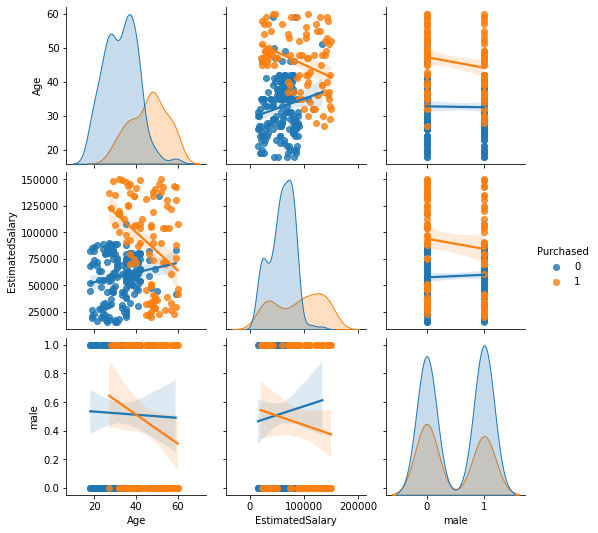

In [100]:
sns.pairplot(hue='Purchased', kind="reg", diag_kind="kde", data=df_train);

Inspect (linear) relationships between variables with correlation (pearson's correlation coefficient)

In [101]:
df.corr().round(2)

,Age,EstimatedSalary,male
Age,1.00,0.16,-0.07
EstimatedSalary,0.16,1.00,-0.06
male,-0.07,-0.06,1.00


In [102]:
alt.Chart(df_train).mark_area(
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X("Age:Q", bin=alt.Bin(maxbins=20)),
    alt.Y('count()', stack = None),
    alt.Color('Purchased:N'),
).properties(width=300)

alt.Chart(...)

Code for seaborn:

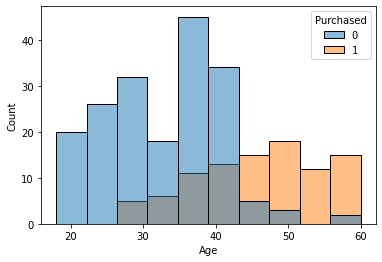

In [103]:
sns.histplot(hue="Purchased", x='Age', data=df_train);

Purchasers seem to be _________ than non-purchaser.

In [104]:
alt.Chart(df_train).mark_boxplot(
    size=50,
    opacity=0.7
).encode(
    x='male:N',
    y=alt.Y('Age:Q', scale=alt.Scale(zero=True)),  
    color='Purchased:N'
).properties(width=300)

alt.Chart(...)

Code for seaborn

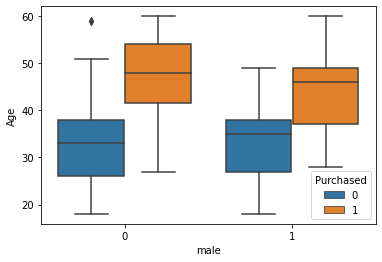

In [105]:
sns.boxplot(x="male", y="Age", hue="Purchased", data=df_train);

There are __________ differences regarding gender.

In [106]:
alt.Chart(df_train).mark_area(
    opacity=0.5,
    interpolate='step'
).encode(
    alt.X("EstimatedSalary:Q", bin=alt.Bin(maxbins=20)),
    alt.Y('count()', stack = None),
    alt.Color('Purchased:N'),
).properties(width=300)

alt.Chart(...)

Code for seaborn

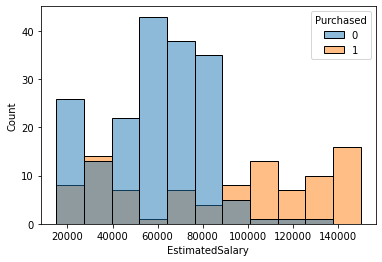

In [107]:
sns.histplot(hue="Purchased", x='EstimatedSalary', data=df_train); 

Purchaser earn a ______________ estimated salary.

In [108]:
alt.Chart(df_train).mark_boxplot(
    size=50,
    opacity=0.7
).encode(
    x='male:N',
    y=alt.Y('EstimatedSalary:Q', scale=alt.Scale(zero=True)),  
    color='Purchased:N'
).properties(width=300)

alt.Chart(...)

Code for seaborn

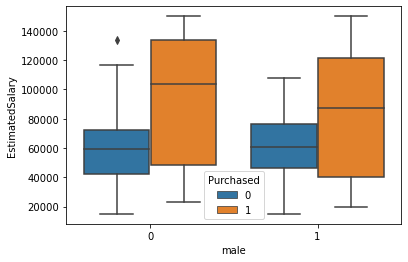

In [109]:
sns.boxplot(x="male", y="EstimatedSalary", hue="Purchased", data=df_train);

Insight: there are ___________ differences between males and females (regarding purchase behavior, age and estimated salary)

### Select features

In [110]:
# only select meaningful predictors

features_model = ['Age', 'EstimatedSalary']

X_train = X_train[features_model] 
X_test = X_test[features_model]

## Model


### Select model

Next, we will fit a logistic regression model with a [L2 regularization (ridge regression)](https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization). In particular, we use an estimator that has built-in cross-validation capabilities to automatically select the best hyper-parameter for our L2 regularization (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV)).

We only use our most promising predictor variables `Age` and `EstimatedSalary` for our model.

In [115]:
# model
clf = LogisticRegressionCV()

### Training

In [116]:
# fit model to data
clf.fit(X_train, y_train)

LogisticRegressionCV()

### Coefficients

In [117]:
clf.intercept_

array([-4.64629128])

In [118]:
clf.coef_

array([[7.57358038e-02, 1.72880947e-05]])

## Classification metrics

In [119]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.7833333333333333

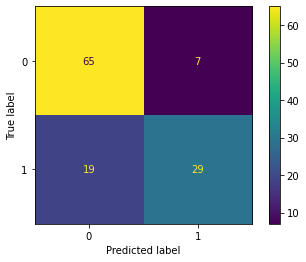

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

In [122]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.77      0.90      0.83        72
         Yes       0.81      0.60      0.69        48

    accuracy                           0.78       120
   macro avg       0.79      0.75      0.76       120
weighted avg       0.79      0.78      0.78       120



The (unweighted) recall of our model is _____  

The (unweighted) precision of our model is _____  

### ROC Curve

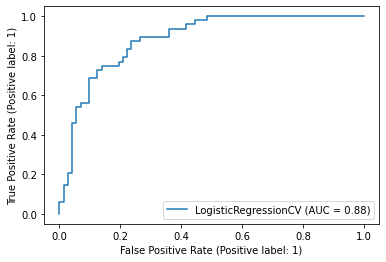

In [123]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test) ;

### AUC Score


In [124]:
from sklearn.metrics import roc_auc_score

y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.8842592592592593

## Thresholds

We use three different thresholds. Which threshold would you recommend if we want to maximize our F1-Score?

In [125]:
pred_proba = clf.predict_proba(X_test)

### Threshold  0.4

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        72
           1       0.71      0.77      0.74        48

    accuracy                           0.78       120
   macro avg       0.77      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120



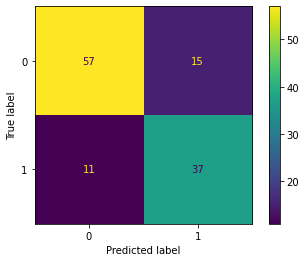

In [126]:
df_04 = pd.DataFrame({'y_pred': pred_proba[:,1] > .4})

ConfusionMatrixDisplay.from_predictions(y_test, df_04['y_pred']);

print(classification_report(y_test, df_04['y_pred']))

### Threshold 0.5

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        72
           1       0.81      0.60      0.69        48

    accuracy                           0.78       120
   macro avg       0.79      0.75      0.76       120
weighted avg       0.79      0.78      0.78       120



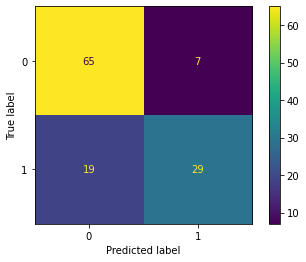

In [127]:
df_05 = pd.DataFrame({'y_pred': pred_proba[:,1] > .5})

ConfusionMatrixDisplay.from_predictions(y_test, df_05['y_pred']);

print(classification_report(y_test, df_05['y_pred']))

### Threshold 0.7

              precision    recall  f1-score   support

           0       0.66      0.96      0.78        72
           1       0.80      0.25      0.38        48

    accuracy                           0.68       120
   macro avg       0.73      0.60      0.58       120
weighted avg       0.71      0.68      0.62       120



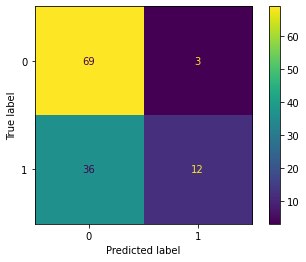

In [128]:
df_07 = pd.DataFrame({'y_pred': pred_proba[:,1] > .7})

ConfusionMatrixDisplay.from_predictions(y_test, df_07['y_pred']);

print(classification_report(y_test, df_07['y_pred']))